##安裝套件

In [1]:
!pip install yfinance

In [5]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00


##上週抓取資料

In [45]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [46]:
# 輸入股票代號
stock_id = "2330.tw"

# 資料結束時間
end = dt.date.today()

# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
data = yf.download(stock_id, start=start, end=end).reset_index()

data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-04-01,783.0,783.0,769.0,770.0,763.630127,21041261
1,2024-04-02,784.0,790.0,783.0,790.0,783.464661,37974481
2,2024-04-03,783.0,785.0,778.0,780.0,773.547363,30890544
3,2024-04-08,789.0,792.0,783.0,783.0,776.522583,32202226
4,2024-04-09,795.0,820.0,792.0,819.0,812.224792,56857731
...,...,...,...,...,...,...,...
117,2024-09-20,981.0,982.0,971.0,973.0,973.000000,60133709
118,2024-09-23,971.0,977.0,971.0,977.0,977.000000,14497067
119,2024-09-24,976.0,987.0,971.0,987.0,987.000000,26785975
120,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.000000,39405222


##計算SMA、RSI、MACD

In [47]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.dates as mdates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

In [48]:
# 計算 SMA
def calculate_SMA(data, window):
    return data['Close'].rolling(window=window).mean()

# 計算 RSI
def calculate_RSI(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

# 計算 MACD
def calculate_MACD(data, short_window=8, long_window=13, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    MACD = short_ema - long_ema
    signal = MACD.ewm(span=signal_window, adjust=False).mean()
    return short_ema, long_ema, MACD


# 計算技術指標
data['SMA_8'] = calculate_SMA(data, 8)
data['SMA_13'] = calculate_SMA(data, 13)
data['SMA_20'] = calculate_SMA(data, 20)
data['RSI_14'] = calculate_RSI(data)
data['EMA_8'], data['EMA_13'], data['MACD'] = calculate_MACD(data)

# 刪除空值
# data.dropna(inplace=True)

data


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_8,SMA_13,SMA_20,RSI_14,EMA_8,EMA_13,MACD
0,2024-04-01,783.0,783.0,769.0,770.0,763.630127,21041261,NaN,NaN,NaN,NaN,770.000000,770.000000,0.000000
1,2024-04-02,784.0,790.0,783.0,790.0,783.464661,37974481,NaN,NaN,NaN,NaN,774.444444,772.857143,1.587302
2,2024-04-03,783.0,785.0,778.0,780.0,773.547363,30890544,NaN,NaN,NaN,NaN,775.679012,773.877551,1.801461
3,2024-04-08,789.0,792.0,783.0,783.0,776.522583,32202226,NaN,NaN,NaN,NaN,777.305898,775.180758,2.125140
4,2024-04-09,795.0,820.0,792.0,819.0,812.224792,56857731,NaN,NaN,NaN,NaN,786.571254,781.440650,5.130605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2024-09-20,981.0,982.0,971.0,973.0,973.000000,60133709,939.125,927.769231,935.05,57.142857,946.144081,940.657848,5.486233
118,2024-09-23,971.0,977.0,971.0,977.0,977.000000,14497067,948.250,930.615385,936.45,57.142857,953.000952,945.849584,7.151368
119,2024-09-24,976.0,987.0,971.0,987.0,987.000000,26785975,959.000,938.153846,938.30,61.463415,960.556296,951.728215,8.828081
120,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.000000,39405222,967.125,946.076923,941.45,83.720930,970.432675,959.338470,11.094205


##可視化

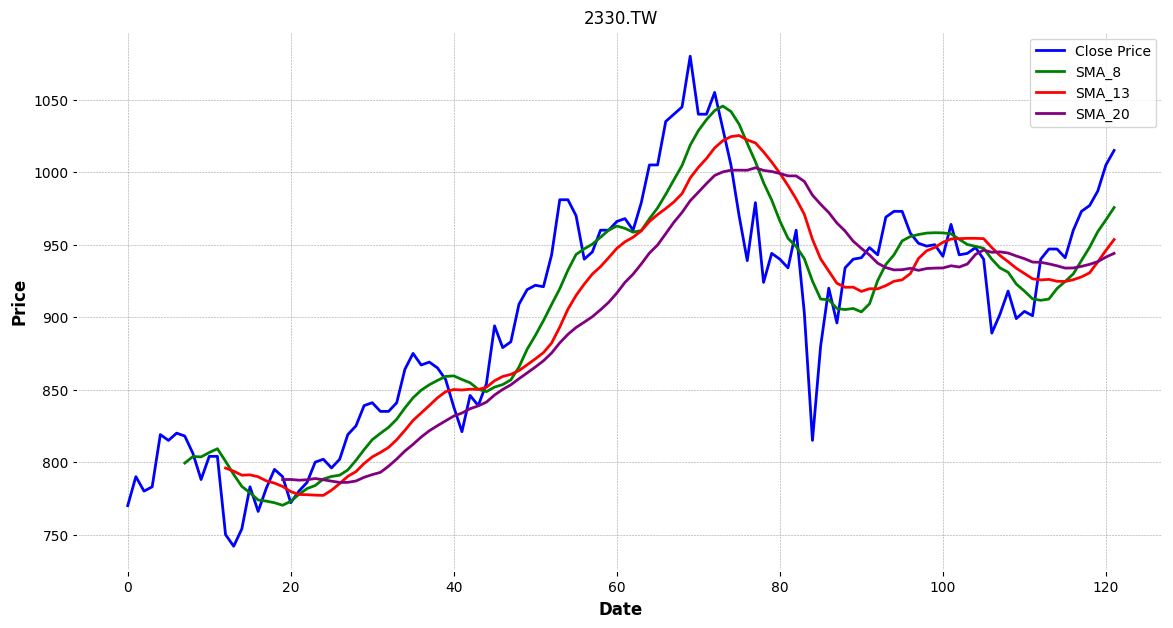

In [49]:
# 繪製收盤價與 SMA 曲線圖
def plot_price_and_sma(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['SMA_8'], label='SMA_8', color='green')
    plt.plot(data['SMA_13'], label='SMA_13', color='red')
    plt.plot(data['SMA_20'], label='SMA_20', color='purple')
    plt.title('2330.TW')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# 繪製收盤價與 SMA 曲線圖
plot_price_and_sma(data)

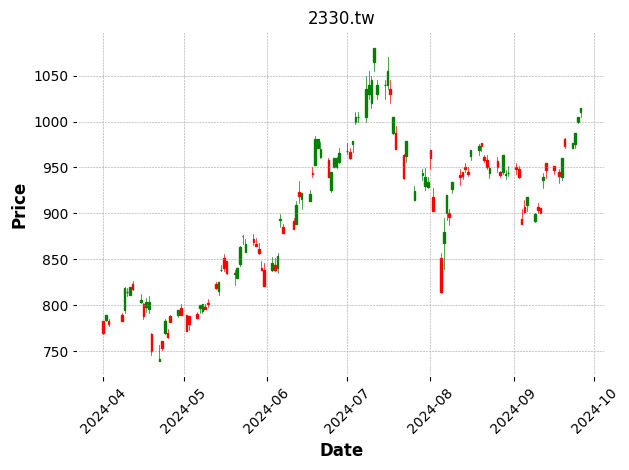

In [50]:
# 繪製 K 線圖
def plot_candlestick(data):
    ohlc = data[['Open', 'High', 'Low', 'Close']].copy()
    ohlc['Date'] = mdates.date2num(data.index.to_pydatetime())
    fig, ax = plt.subplots()
    candlestick_ohlc(ax, ohlc[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.6, colorup='g', colordown='r')
    ax.xaxis_date()
    # 添加標題和坐標軸標籤
    plt.title('2330.tw')  # 標題
    plt.xlabel('Date')  # X 軸標籤
    plt.ylabel('Price')  # Y 軸標籤

    plt.xticks(rotation=45)  # 旋轉 X 軸標籤
    plt.tight_layout()  # 自動調整圖表以適應標籤
    plt.show()

# 繪製 K 線圖
k_data = data.copy()
k_data['Date'] = pd.to_datetime(k_data['Date'])
k_data.set_index('Date', inplace=True)

plot_candlestick(k_data)

##預測第 n 天的股價

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [52]:
# 刪除空值
data.dropna(inplace=True)

# 準備訓練資料
X = data[['SMA_8', 'SMA_13', 'SMA_20', 'RSI_14', 'MACD']]
y = data['Close'].shift(-1)

# 刪除最後一行，因為它的 y 值為 NaN
X = X[:-1]
y = y.dropna()

# 分割訓練與測試集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train

,SMA_8,SMA_13,SMA_20,RSI_14,MACD
72,1042.500,1016.769231,997.75,74.869110,16.485283
41,857.000,849.769231,833.85,50.793651,3.151058
87,906.000,923.384615,964.95,37.015504,-16.280304
63,959.750,959.538462,936.70,68.750000,10.327803
117,939.125,927.769231,935.05,57.142857,5.486233
...,...,...,...,...,...
79,980.750,1007.000000,1000.45,41.551247,-10.785735
90,903.625,917.769231,947.45,50.212766,-5.212954
33,829.625,815.461538,802.15,72.972973,8.826605
111,912.625,926.461538,938.00,35.632184,-7.853815


###線性回歸

In [62]:
# 線性回歸模型
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# 評估模型
y_pred_lr = lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print(f"Linear Regression RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = lr_model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來1天的價格: {future_pred[0]:.2f}")

Linear Regression RMSE: 17.94
線性回歸模型預測未來1天的價格: 1003.57


###決策樹

In [63]:
# 決策樹模型
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

# 評估模型
y_pred_dt = dt_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
print(f"Decision Tree RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = dt_model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"決策樹模型預測未來1天的價格: {future_pred[0]:.2f}")

Decision Tree RMSE: 36.23
決策樹模型預測未來1天的價格: 1015.00


###隨機森林

In [66]:
# 隨機森林模型
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

# 評估模型
y_pred_rf = rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
print(f"Random Forest RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = rf_model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"隨機森林模型預測未來1天的價格: {future_pred[0]:.2f}")

Random Forest RMSE: 20.71
隨機森林模型預測未來1天的價格: 997.69


###可視化

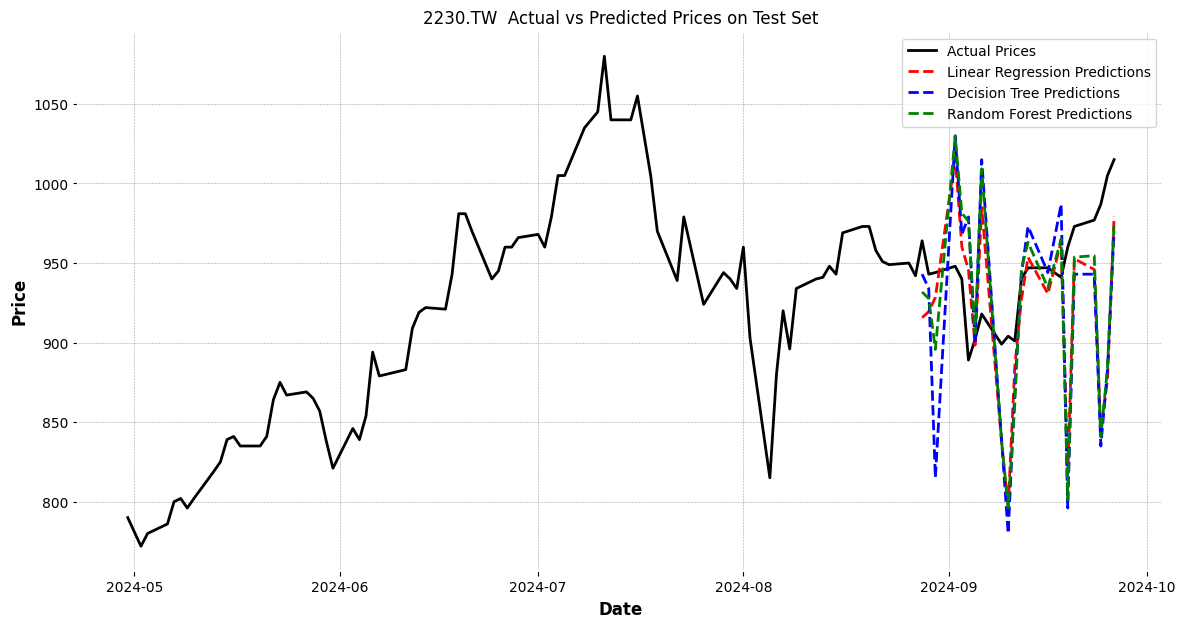

In [67]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(data['Date'][-len(y_test):], y_pred_lr, label='Linear Regression Predictions', linestyle='--', color='red')
plt.plot(data['Date'][-len(y_test):], y_pred_dt, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.plot(data['Date'][-len(y_test):], y_pred_rf, label='Random Forest Predictions', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()